In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, pearsonr

import os
import time
import itertools

from glove_VI.glv3 import *

In [2]:
# import file names
files = os.listdir("data/SET3_Thirdtrial/")
files

['CDanc_CDmono12h_PROVIDET0.csv', 'CDevo_CDmono12h_PROVIDET0.csv']

In [3]:
exp_names = []
# for file in files:
file = files[0]
    
# define strain name
strain = file.split("_")[0]

# import data
df = pd.read_csv(f"data/SET3_Thirdtrial/{file}")
df.sort_values(by=["Treatments", "Time"], inplace=True)

# make sure that conditions have at least one measurement
dfs = []
for treatment, df_t in df.groupby("Treatments"):
    if df_t.shape[0] > 1:
        dfs.append(df_t)
df = pd.concat(dfs)

# determine species names 
species = df.columns.values[2:]

In [4]:
# init model 
model = gLV(dataframe=df, 
            species=species,
            lmbda=.001)

# init params
print(f"Number of parameters: {model.n_params}")

Number of parameters: 240


In [5]:
# fit to data 
f = model.fit_rmse(epochs=200)

Epoch 0, RMSE: 3.587
Epoch 10, RMSE: 0.232
Epoch 20, RMSE: 0.096
Epoch 30, RMSE: 0.078
Epoch 40, RMSE: 0.050
Epoch 50, RMSE: 0.047
Epoch 60, RMSE: 0.047
Epoch 70, RMSE: 0.047
Epoch 80, RMSE: 0.047
Epoch 90, RMSE: 0.046
Epoch 100, RMSE: 0.046
Epoch 110, RMSE: 0.046
Epoch 120, RMSE: 0.047
Epoch 130, RMSE: 0.046
Epoch 140, RMSE: 0.046
Epoch 150, RMSE: 0.046


KeyboardInterrupt: 

In [10]:
r, A, B = reshape(model.shapes, model.z)

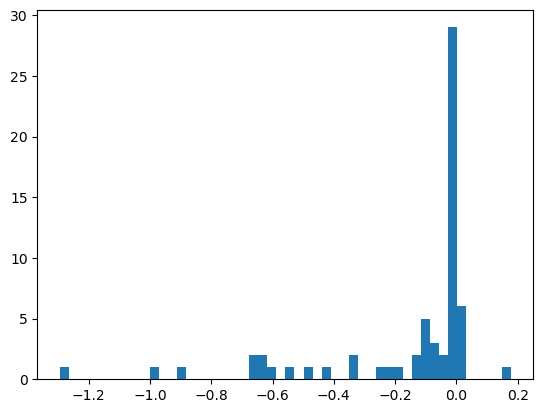

In [17]:
plt.hist(A.ravel(), bins=50)
plt.show()

In [16]:
np.sum(np.abs(B.ravel()) > .001) / len(B.ravel())

0.09523809523809523

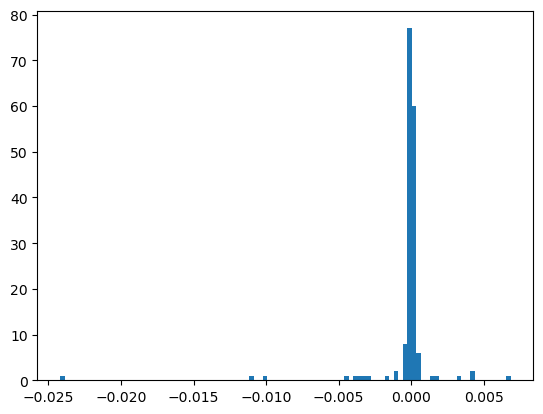

In [14]:
plt.hist(B.ravel(), bins=100)
plt.show()